In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'final grad')

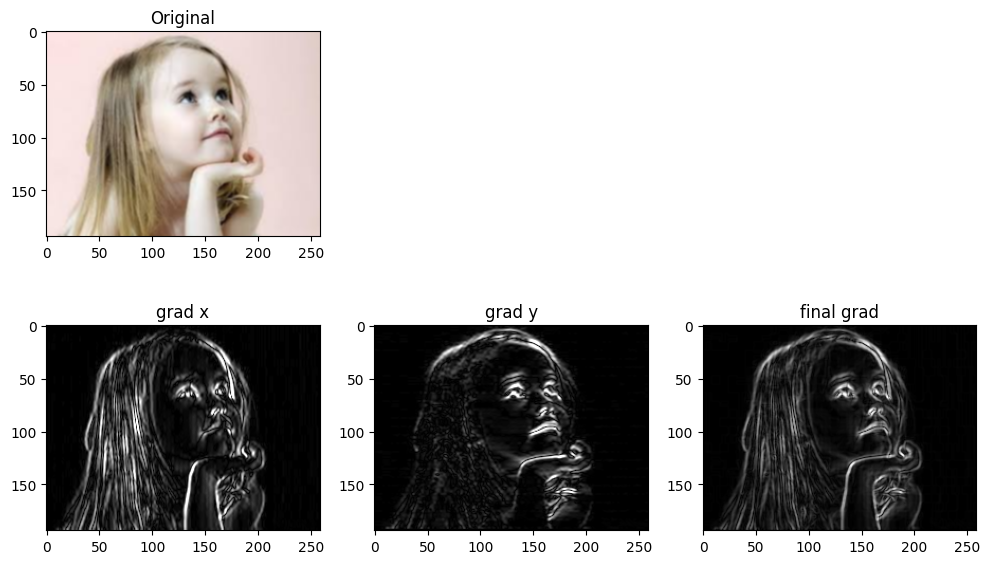

In [6]:
# Sobel Edge detection

src = cv2.imread("images/little_girl.jpg")

src = cv2.GaussianBlur(src, (3, 3), 0)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

grad_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3)
grad_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3)

abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.figure(figsize=[12,7])
plt.subplot(231);plt.imshow(src[...,::-1]);plt.title("Original")
plt.subplot(234);plt.imshow(abs_grad_x, cmap='gray');plt.title("grad x")
plt.subplot(235);plt.imshow(abs_grad_y, cmap='gray');plt.title("grad y")
plt.subplot(236);plt.imshow(grad, cmap='gray');plt.title("final grad")

Text(0.5, 1.0, 'Laplacian')

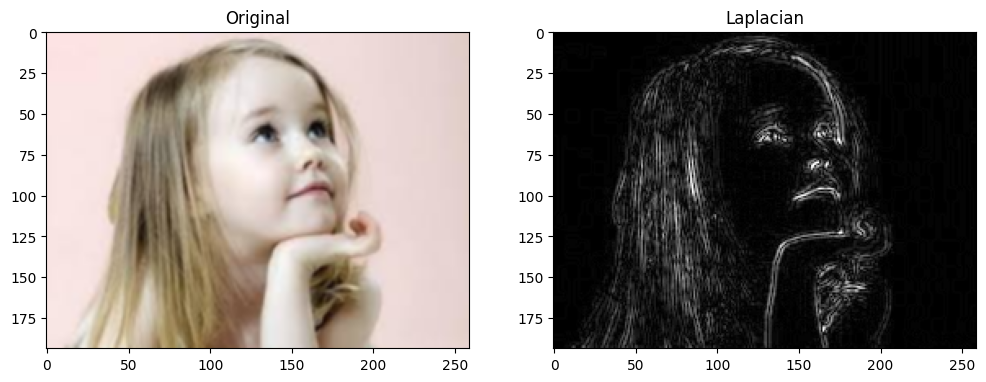

In [7]:
# Laplacian

src = cv2.imread("images/little_girl.jpg") 

src = cv2.GaussianBlur(src, (3, 3), 0)
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dst = cv2.Laplacian(src_gray, cv2.CV_16S, ksize=3)
abs_dst = cv2.convertScaleAbs(dst)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(src[...,::-1]);plt.title("Original")
plt.subplot(122);plt.imshow(abs_dst, cmap='gray');plt.title("Laplacian")

In [9]:
def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

Text(0.5, 1.0, '106.60511290906896')

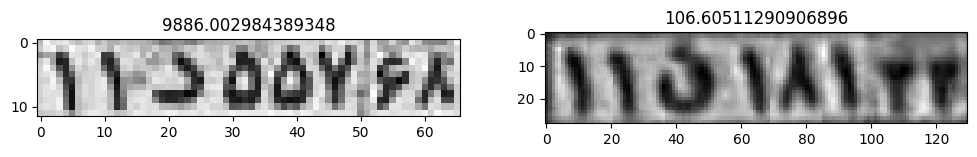

In [10]:
image1 = cv2.imread('images/plate_cropped.jpg',0)
image2 = cv2.imread('images/plate3_cropped.jpg',0)

metric_image1 = variance_of_laplacian(image1)
metric_image2 = variance_of_laplacian(image2)

plt.figure(figsize=[12,7])
plt.subplot(121);plt.imshow(image1, cmap='gray');plt.title(metric_image1)
plt.subplot(122);plt.imshow(image2, cmap='gray');plt.title(metric_image2)

In [8]:
# Canny Edge

max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3

def CannyThreshold(val):
    low_threshold = val
    img_blur = cv2.GaussianBlur(src_gray, (3,3), 0)
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv2.imshow(window_name, dst)
    
src = cv2.imread("images/little_girl.jpg")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

cv2.namedWindow(window_name, cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)

CannyThreshold(0)

cv2.waitKey()
cv2.destroyAllWindows()